## Unemployment Analysis

### Import the libraries and load the dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset and show the first 5 rows
unemployment_data = pd.read_csv('unemployment.csv')

unemployment_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### Exploratory Data Analysis

In [3]:
# Getting the shape of our dataset, total rows and total columns
unemployment_data.shape

(768, 7)

In [4]:
# Let's check the columns and their data types
unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
# Statistical analysis
unemployment_data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


#### Check for inconsistencies and fix them
We will change column names into lower case characters, there are also white spaces before some column names, change date format from object to datatime, check for duplicates regions and missing values

In [6]:
# Turn column names into lower case
unemployment_data.columns = unemployment_data.columns.str.lower()

unemployment_data.head()

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
# There are white spaces at the beginning of some columns, let's remove them.

unemployment_data.columns = unemployment_data.columns.str.strip()

unemployment_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   region                                   740 non-null    object 
 1   date                                     740 non-null    object 
 2   frequency                                740 non-null    object 
 3   estimated unemployment rate (%)          740 non-null    float64
 4   estimated employed                       740 non-null    float64
 5   estimated labour participation rate (%)  740 non-null    float64
 6   area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
# Check for unique values in the region, area and frequency columns

unique_region = unemployment_data['region'].unique()
unique_area = unemployment_data['area'].unique()
unique_frequency = unemployment_data['frequency'].unique()

print(f'The unique regions: {unique_region}\n\nThe unique area: {unique_area}\n\nThe unique frequency: {unique_frequency}')

The unique regions: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']

The unique area: ['Rural' nan 'Urban']

The unique frequency: [' Monthly' nan 'Monthly']


It looks like there are no inconsistent entries in the selected columns,
We will conduct our analysis using only 4 columns namely 'region', 'date', 'estimated unemployment rate', and 'area'.
There are also missing values that we will handle.

In [9]:
# Let's select our columns for analysis
my_df = unemployment_data.loc[:,['region', 'date', 'estimated unemployment rate (%)', 'area']]
my_df.head()

,region,date,estimated unemployment rate (%),area
0,Andhra Pradesh,31-05-2019,3.65,Rural
1,Andhra Pradesh,30-06-2019,3.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,Rural
3,Andhra Pradesh,31-08-2019,3.32,Rural
4,Andhra Pradesh,30-09-2019,5.17,Rural


In [10]:
# Checking for missing values
my_df.isnull().sum()


region                             28
date                               28
estimated unemployment rate (%)    28
area                               28
dtype: int64

All the columns have the exact number of missing values, as there are no additional information to justify this, 
it could be due to data collection or data entry issue with rows where all columns have missing values. 
Let's calculate the percentage of missing values and drop them if they're relatively low.

In [11]:
# Checking the percentage of missing values in each columns
missing_percent = my_df.isnull().mean() * 100

print(missing_percent)

region                             3.645833
date                               3.645833
estimated unemployment rate (%)    3.645833
area                               3.645833
dtype: float64


In [12]:
# As the percentage of missing values are relatively low, dropping them will be a better option
my_df.dropna()


,region,date,estimated unemployment rate (%),area
0,Andhra Pradesh,31-05-2019,3.65,Rural
1,Andhra Pradesh,30-06-2019,3.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,Rural
3,Andhra Pradesh,31-08-2019,3.32,Rural
4,Andhra Pradesh,30-09-2019,5.17,Rural
...,...,...,...,...
749,West Bengal,29-02-2020,7.55,Urban
750,West Bengal,31-03-2020,6.67,Urban
751,West Bengal,30-04-2020,15.63,Urban
752,West Bengal,31-05-2020,15.22,Urban


In [13]:
# Let's check the data type in the date column, and change it if it's an object
# We can see that the date is in the wrong format
# we should change it from object to datetime
# my_df.info()
my_df['date'] = pd.to_datetime(my_df['date'])

C:\Users\kmas\AppData\Local\Temp\ipykernel_22248\3800344735.py:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  my_df['date'] = pd.to_datetime(my_df['date'])


## Data Visualisation And Analysis

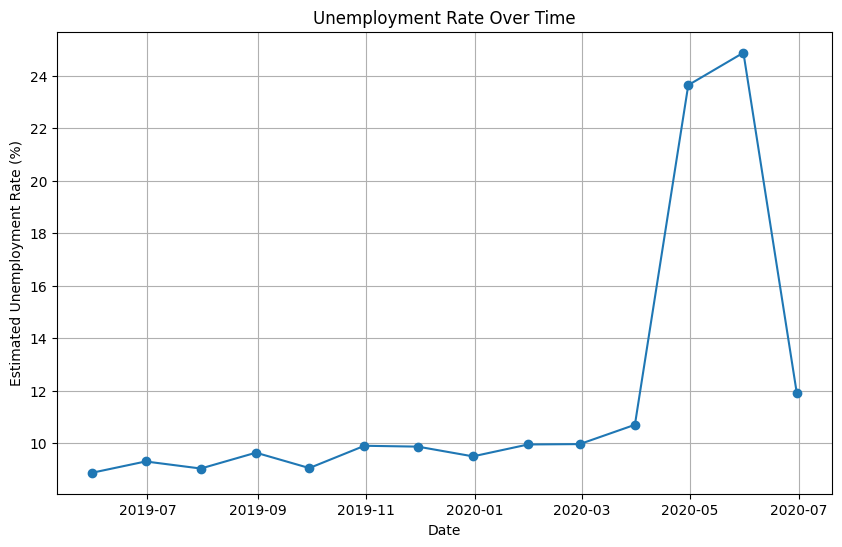

In [14]:
import plotly.express as px

#  Mean unemployment rate over time
mean_unemployment_over_time = my_df.groupby('date')['estimated unemployment rate (%)'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

### Observations
Unemployment rates started to climb from march 2020 and continue to rise rapidly from April 2020 until July 2020. This period coincide 
with the rise of the corona virus pandemic when contries were implementing lockdown measures worldwide to contain the virus and minimize 
contaminations and fatalities.

#### Estimated Unemployment Rate By Region

In [15]:
# Bar Plot of Average Estimated Unemployment Rate by region
mean_unemployment_by_region = my_df.groupby('region')['estimated unemployment rate (%)'].mean().reset_index()
fig = px.bar(
    mean_unemployment_by_region,
    x='region',
    y='estimated unemployment rate (%)',
    color='region',
    title='Average Unemployment Rate by Region'
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

#### Estimated Unemployment Rate By Area

In [16]:
# Bar Plot of Average Estimated Unemployment Rate by Area
mean_unemployment_by_area = my_df.groupby('area')['estimated unemployment rate (%)'].mean().reset_index()
fig = px.bar(
    mean_unemployment_by_area,
    x='area',
    y='estimated unemployment rate (%)',
    color='area',
    title='Average Unemployment Rate by Area'
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

#### Estimated Unemployment Rate By Date And Region

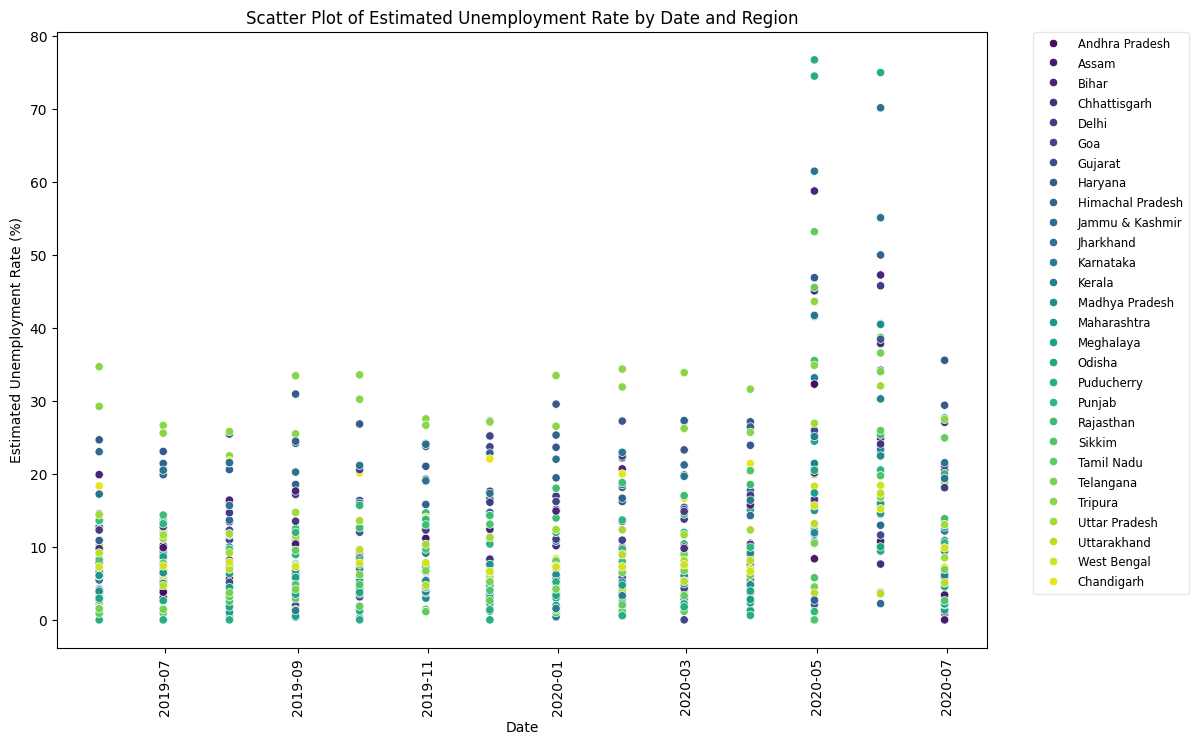

In [17]:
# Estimated Unemployment Rate by date and region
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=my_df, x='date', y='estimated unemployment rate (%)', hue='region', palette='viridis')

#legend = scatter_plot.legend(loc='upper right', ncol=len(my_df['region'].unique()), title='Region', title_fontsize='15')
legend = scatter_plot.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Make legend background transparent
legend.get_frame().set_alpha(0.5)

# Reduce legend font size
for text in legend.get_texts():
    text.set_fontsize('small')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Scatter Plot of Estimated Unemployment Rate by Date and Region')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [18]:
mean_unemployment_area_region = my_df.groupby(['area', 'region'])['estimated unemployment rate (%)'].mean().reset_index()

# Create a treemap with mean unemployment rates
fig = px.treemap(
    mean_unemployment_area_region,
    path=[px.Constant('India'), 'area', 'region'],
    values='estimated unemployment rate (%)',
    color='estimated unemployment rate (%)',
    hover_data=['area', 'region']
)

# Show the plot
fig.show()

#### Estimated Unemployment Rate by Area and Region

In [22]:
mean_area_region_df = my_df.groupby(['area', 'region'])['estimated unemployment rate (%)'].mean().reset_index()

fig = px.sunburst(
    mean_area_region_df,
    path=['area', 'region'],
    values='estimated unemployment rate (%)',
    #color='estimated unemployment rate (%)',
    title = 'Sunburst plot of Estimated Unemployment Rate by Region and Area',
    hover_data=['region']
)

fig.show()

### **Observations**

We can see that unemployment rate increased sharply from around March 2020 to July 2020 for all the regions. The period correspond to the pick of covid 19 pandemic 
when countries worldwide were implimenting lockdown measures to contain the virus.

We have also notice, from previous graphs that unemployment rate is lower in rural areas than in Urban areas, this could be due to higher population density in urban area,
or lack of data in rural area.